<font size=5>Keras tutorial - the Happy House——Keras教程

In [3]:
import numpy as np
from keras import layers
from keras.layers import Input, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D
from keras.layers import AveragePooling2D, MaxPooling2D, Dropout, GlobalMaxPooling2D, GlobalAveragePooling2D
from keras.models import Model
from keras.preprocessing import image
from keras.utils import layer_utils
from keras.utils.data_utils import get_file
from keras.applications.imagenet_utils import preprocess_input
import pydot
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.utils import plot_model
from kt_utils import *

import keras.backend as K
K.set_image_data_format('channels_last')
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow

import os
os.environ["HDF5_USE_FILE_LOCKING"] = "FALSE"

%matplotlib inline

/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZTVN10tenso

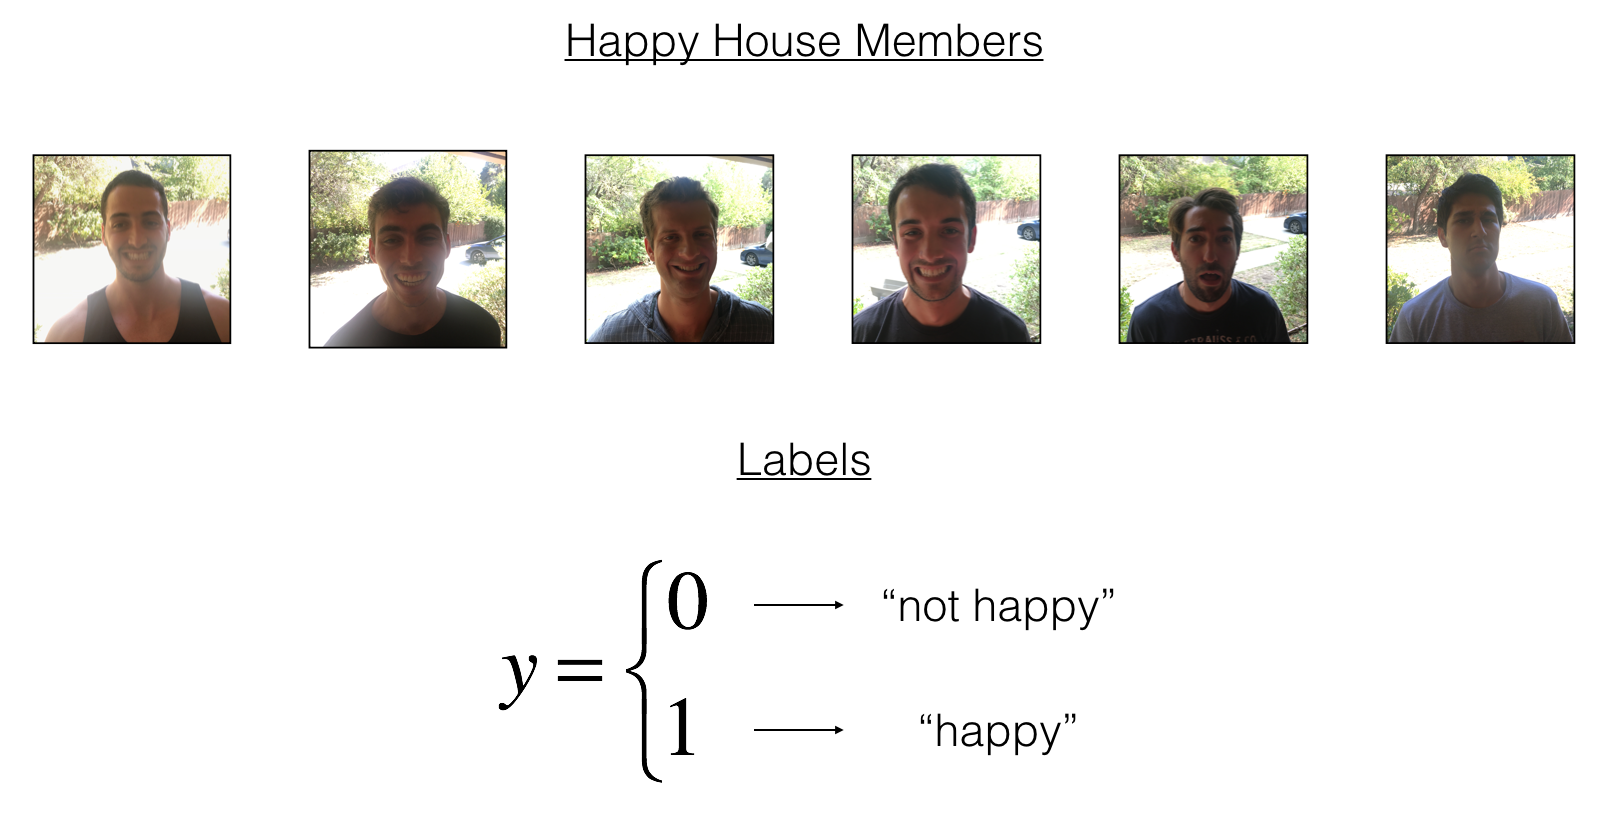

In [4]:
# 加载数据集
X_train_orig, Y_train_orig, X_test_orig, Y_test_orig, classes = load_dataset()

# 标准化图像向量
X_train = X_train_orig/255.
X_test = X_test_orig/255.

# 重塑标签
Y_train = Y_train_orig.T
Y_test = Y_test_orig.T

# 输出训练集和测试集的样本数量
print ("number of training examples = " + str(X_train.shape[0]))
print ("number of test examples = " + str(X_test.shape[0]))

# 输出训练集和测试集的形状
print ("X_train shape: " + str(X_train.shape))
print ("Y_train shape: " + str(Y_train.shape))
print ("X_test shape: " + str(X_test.shape))
print ("Y_test shape: " + str(Y_test.shape))

number of training examples = 600
number of test examples = 150
X_train shape: (600, 64, 64, 3)
Y_train shape: (600, 1)
X_test shape: (150, 64, 64, 3)
Y_test shape: (150, 1)


In [5]:
def HappyModel(input_shape):
    """
    HappyModel的实现。

    参数：
    input_shape -- 输入图像的形状

    返回值：
    model -- Keras中的Model()实例
    """
    
    # 定义输入占位符，形状为input_shape。将其视为输入图像！
    X_input = Input(input_shape)

    # 零填充：用零填充X_input的边界
    X = ZeroPadding2D((3, 3))(X_input)

    # CONV -> BN -> RELU块应用于X
    X = Conv2D(32, (7, 7), strides=(1, 1), name='conv0')(X)
    X = BatchNormalization(axis=3, name='bn0')(X)
    X = Activation('relu')(X)

    # 最大池化
    X = MaxPooling2D((2, 2), name='max_pool')(X)

    # 将X扁平化（将其转换为向量）+ 全连接层
    X = Flatten()(X)
    X = Dense(1, activation='sigmoid', name='fc')(X)

    # 创建模型。这将创建您的Keras模型实例，您将使用此实例来训练/测试模型。
    model = Model(inputs=X_input, outputs=X, name='HappyModel')

    return model

In [6]:
# 创建HappyModel实例
happyModel = HappyModel(X_train.shape[1:])  

In [7]:
# 编译模型，指定优化器、损失函数和评估指标
happyModel.compile('adam', 'binary_crossentropy', metrics=['accuracy'])  

In [8]:
# 使用训练数据拟合模型，指定训练轮数和批次大小
happyModel.fit(X_train, Y_train, epochs=40, batch_size=50)  

Epoch 1/40
12/12 [==============================] - 4s 199ms/step - loss: 1.2997 - accuracy: 0.6317
Epoch 2/40
12/12 [==============================] - 2s 198ms/step - loss: 0.5762 - accuracy: 0.7800
Epoch 3/40
12/12 [==============================] - 2s 199ms/step - loss: 0.2719 - accuracy: 0.9000
Epoch 4/40
12/12 [==============================] - 2s 199ms/step - loss: 0.1648 - accuracy: 0.9400
Epoch 5/40
12/12 [==============================] - 2s 198ms/step - loss: 0.1114 - accuracy: 0.9583
Epoch 6/40
12/12 [==============================] - 2s 195ms/step - loss: 0.1101 - accuracy: 0.9717
Epoch 7/40
12/12 [==============================] - 2s 196ms/step - loss: 0.0834 - accuracy: 0.9817
Epoch 8/40
12/12 [==============================] - 2s 195ms/step - loss: 0.0746 - accuracy: 0.9750
Epoch 9/40
12/12 [==============================] - 2s 203ms/step - loss: 0.0909 - accuracy: 0.9733
Epoch 10/40
12/12 [==============================] - 3s 217ms/step - loss: 0.0740 - accuracy: 0.9750

In [9]:
# 使用测试集对HappyModel进行评估
preds = happyModel.evaluate(X_test, Y_test, batch_size=32, verbose=1, sample_weight=None)

# 打印评估结果
print()
print("Loss = " + str(preds[0]))  # 打印损失值
print("Test Accuracy = " + str(preds[1]))  # 打印测试准确率

5/5 [==============================] - 0s 31ms/step - loss: 0.0769 - accuracy: 0.9667

Loss = 0.07689788937568665
Test Accuracy = 0.9666666388511658


1/1 [==============================] - 0s 135ms/step
[[0.]]


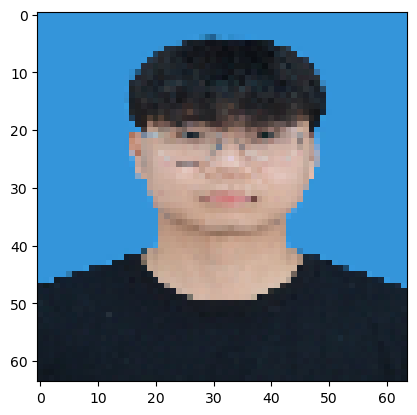

In [10]:
import tensorflow as tf

# 指定图像路径
img_path = 'my_image.jpg'

# 使用Keras加载图像并调整大小为(64, 64)
img = tf.keras.preprocessing.image.load_img(img_path, target_size=(64, 64))

# 显示图像
imshow(img)

# 将图像转换为数组形式
x = tf.keras.preprocessing.image.img_to_array(img)

# 扩展维度，使其符合模型的输入要求
x = np.expand_dims(x, axis=0)

# 对图像进行预处理
x = preprocess_input(x)

# 使用HappyModel对图像进行预测
prediction = happyModel.predict(x)

# 打印预测结果
print(prediction)

In [11]:
# 打印HappyModel的模型摘要信息
happyModel.summary()

Model: "HappyModel"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 64, 64, 3)]       0         
                                                                 
 zero_padding2d (ZeroPadding  (None, 70, 70, 3)        0         
 2D)                                                             
                                                                 
 conv0 (Conv2D)              (None, 64, 64, 32)        4736      
                                                                 
 bn0 (BatchNormalization)    (None, 64, 64, 32)        128       
                                                                 
 activation (Activation)     (None, 64, 64, 32)        0         
                                                                 
 max_pool (MaxPooling2D)     (None, 32, 32, 32)        0         
                                                        